# 1. 분류모델 기초

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#matplotlib inline

In [3]:
df =pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 데이터 준비

#### 학습, 예측 데이터셋 나누기

In [5]:
# 8:2비율로 나눔
split_count = int(df.shape[0]*0.8)
split_count

614

In [7]:
train = df[:split_count].copy()
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0
610,3,106,54,21,158,30.9,0.292,24,0
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1


In [9]:
test = df[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


####  학습, 예측에 사용할 컬럼

In [14]:
#학습과 예측에 사용할 컬럼명
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
#정답값이자 예측해야 될 값
label_name = train.columns[-1]
label_name

'Outcome'

####학습, 예측 데이터셋 만들기

In [20]:
# 학습세트 만들기 - 기출문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
#정답 값 만들기 - 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
#예측에 사용할 데이터 세트 만들기 - 실전 시험문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [28]:
#예측의 정답값 - 실전 시험문제의 정답
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 머신러닝 알고리즘

In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [30]:
#학습(훈련)

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
#예측
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

#### 트리 알고리즘 분석하기

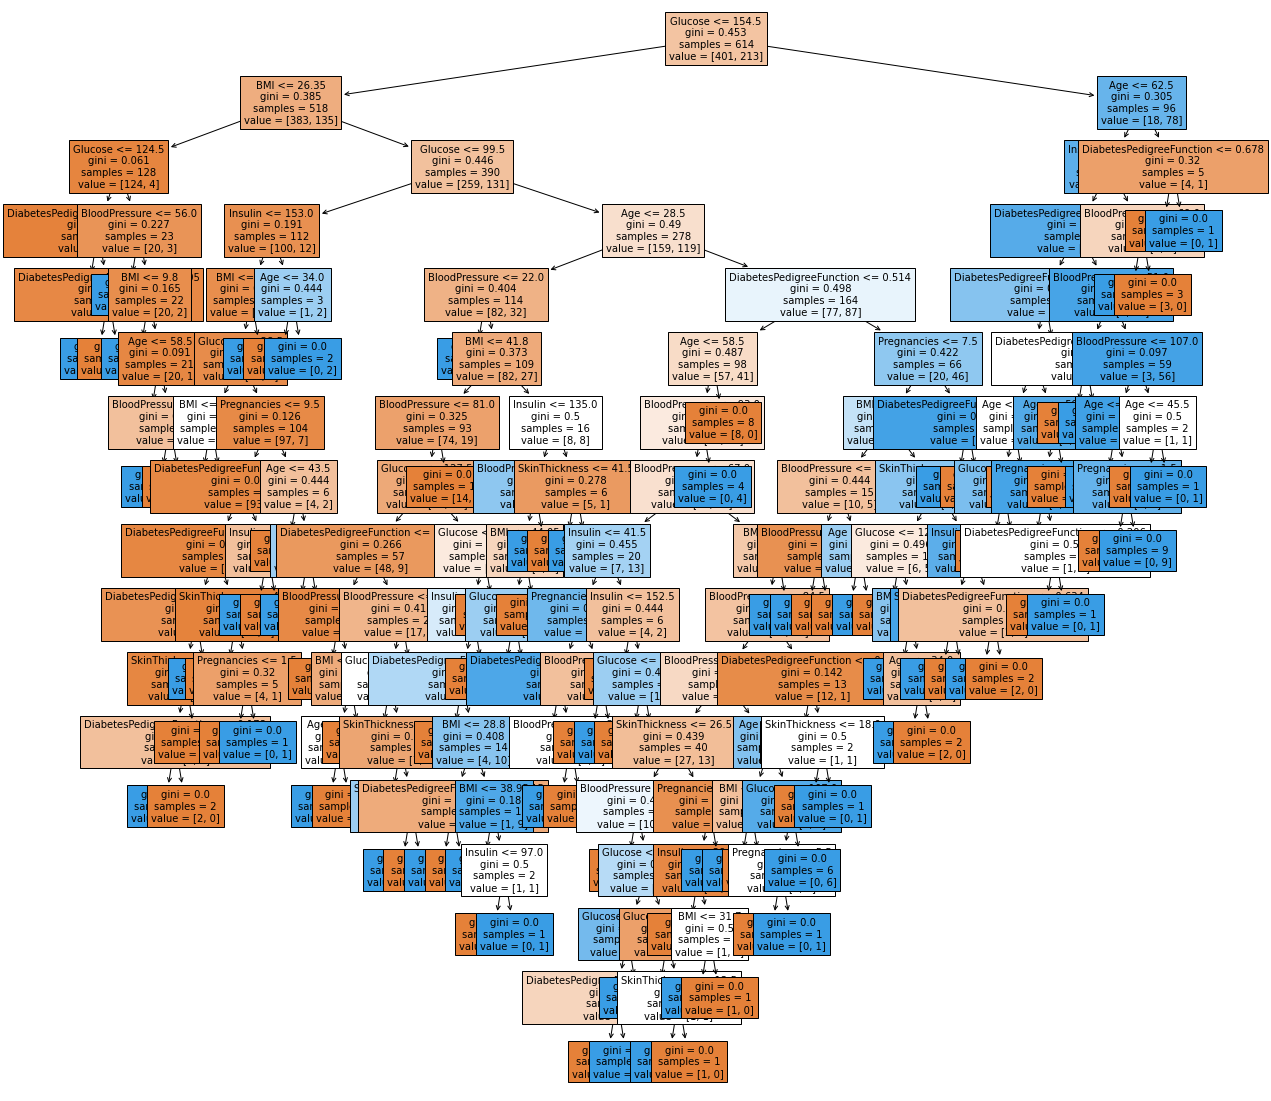

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names = feature_names, 
                 filled=True,
                 fontsize=10)


In [ ]:
#graphviz 로 시각화 - 별도 설치 필요

In [37]:
#피처의 중요도 추출
model.feature_importances_

array([0.05239134, 0.32041568, 0.13500037, 0.05508546, 0.05649342,
       0.14620802, 0.11954758, 0.11485812])

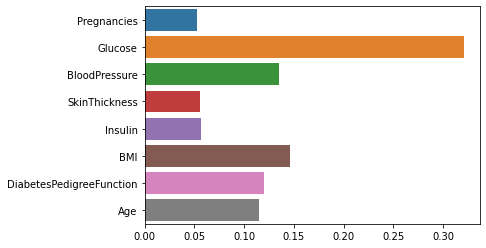

In [38]:
#피처의 중요도 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)

#### 정확도(Accuracy)측정하기

In [43]:
#실제값-예측값 빼주면 같은 값은 0
#절대값을 씌우면, 1인 값은 다르게 예측한 값이 됨

diff_count = abs(y_test - y_predict).sum()

In [45]:
#예측의 정확도 구하기
(len(y_test) - diff_count) / len(y_test) *100

74.02597402597402

In [49]:
#위처럼 직접 해도 되지만 미리 구현된 알고리즘 가져와 사용한다
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

74.02597402597402

In [52]:
#model의 score로 점수를 계산
model.score(X_test, y_test)*100

74.02597402597402